In [2]:
!pip install tensorflow_addons

     |████████████████████████████████| 706kB 5.2MB/s 


In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import tensorflow_addons as tfa

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
def get_model():
    model = tf.keras.applications.ResNet50(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=train_images.shape[1:],
        pooling=None,
        classes=10,
        classifier_activation="softmax",
    )

    return model

In [4]:
def plot_acc_loss(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()
    plt.close()

    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label = 'val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='lower right')
    plt.show()
    plt.close()  

In [8]:
adam_model = get_model()

adam_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                   metrics=['accuracy'])

history_adam = adam_model.fit(train_images, train_labels, batch_size=512, 
                         epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
98/98 [==============================] - 42s 360ms/step - loss: 2.5504 - accuracy: 0.2249 - val_loss: 2.4198 - val_accuracy: 0.1000
Epoch 2/50
98/98 [==============================] - 34s 348ms/step - loss: 1.5518 - accuracy: 0.4419 - val_loss: 2.6824 - val_accuracy: 0.1061
Epoch 3/50
98/98 [==============================] - 34s 348ms/step - loss: 1.3069 - accuracy: 0.5338 - val_loss: 2.9284 - val_accuracy: 0.1110
Epoch 4/50
98/98 [==============================] - 34s 348ms/step - loss: 1.1339 - accuracy: 0.5994 - val_loss: 2.6116 - val_accuracy: 0.2350
Epoch 5/50
98/98 [==============================] - 34s 348ms/step - loss: 0.9772 - accuracy: 0.6506 - val_loss: 2.1743 - val_accuracy: 0.3278
Epoch 6/50
98/98 [==============================] - 34s 349ms/step - loss: 0.8555 - accuracy: 0.6970 - val_loss: 1.7394 - val_accuracy: 0.4401
Epoch 7/50
98/98 [==============================] - 34s 348ms/step - loss: 0.7286 - accuracy: 0.7475 - val_loss: 1.7484 - val_accuracy: 0.4688

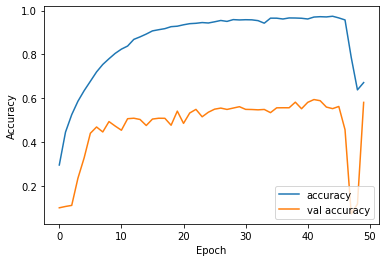

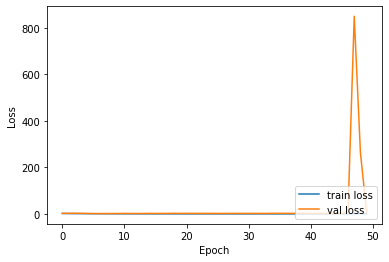

In [9]:
plot_acc_loss(history_adam)

In [10]:
lookahead_model = get_model()

lookahead = tfa.optimizers.Lookahead(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005), sync_period=5, slow_step_size=0.6)
lookahead_model.compile(optimizer=lookahead, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                   metrics=['accuracy'])

history_lookahead = lookahead_model.fit(train_images, train_labels, batch_size=512, 
                              epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
98/98 [==============================] - 76s 449ms/step - loss: 2.6143 - accuracy: 0.2078 - val_loss: 2.5214 - val_accuracy: 0.1044
Epoch 2/50
98/98 [==============================] - 43s 438ms/step - loss: 1.6523 - accuracy: 0.4083 - val_loss: 2.7452 - val_accuracy: 0.1098
Epoch 3/50
98/98 [==============================] - 43s 435ms/step - loss: 1.3966 - accuracy: 0.5048 - val_loss: 3.1910 - val_accuracy: 0.1279
Epoch 4/50
98/98 [==============================] - 43s 435ms/step - loss: 1.1966 - accuracy: 0.5762 - val_loss: 3.0350 - val_accuracy: 0.1830
Epoch 5/50
98/98 [==============================] - 43s 435ms/step - loss: 1.0183 - accuracy: 0.6431 - val_loss: 2.3493 - val_accuracy: 0.2842
Epoch 6/50
98/98 [==============================] - 42s 433ms/step - loss: 0.8834 - accuracy: 0.6883 - val_loss: 2.1343 - val_accuracy: 0.3528
Epoch 7/50
98/98 [==============================] - 43s 437ms/step - loss: 0.7473 - accuracy: 0.7383 - val_loss: 1.8841 - val_accuracy: 0.4325

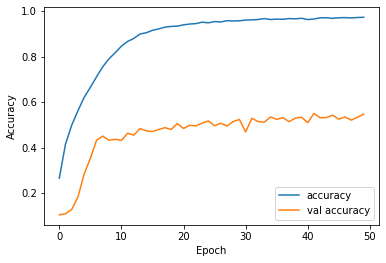

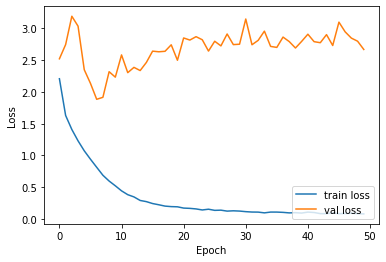

In [11]:
plot_acc_loss(history_lookahead)

In [12]:
SGD_momentum_model = get_model()

SGD_momentum_model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.005), 
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                           metrics=['accuracy'])

history_SGD_momentum = SGD_momentum_model.fit(train_images, train_labels, batch_size=512, 
                              epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
98/98 [==============================] - 41s 358ms/step - loss: 2.9062 - accuracy: 0.1680 - val_loss: 2.3457 - val_accuracy: 0.1000
Epoch 2/50
98/98 [==============================] - 34s 344ms/step - loss: 2.0726 - accuracy: 0.3186 - val_loss: 2.3271 - val_accuracy: 0.1364
Epoch 3/50
98/98 [==============================] - 34s 344ms/step - loss: 1.7568 - accuracy: 0.4007 - val_loss: 2.0249 - val_accuracy: 0.2593
Epoch 4/50
98/98 [==============================] - 34s 344ms/step - loss: 1.5897 - accuracy: 0.4557 - val_loss: 1.7162 - val_accuracy: 0.4081
Epoch 5/50
98/98 [==============================] - 34s 344ms/step - loss: 1.4226 - accuracy: 0.5074 - val_loss: 1.5631 - val_accuracy: 0.4434
Epoch 6/50
98/98 [==============================] - 34s 344ms/step - loss: 1.3088 - accuracy: 0.5464 - val_loss: 1.5480 - val_accuracy: 0.4547
Epoch 7/50
98/98 [==============================] - 34s 344ms/step - loss: 1.1988 - accuracy: 0.5828 - val_loss: 1.5843 - val_accuracy: 0.4454

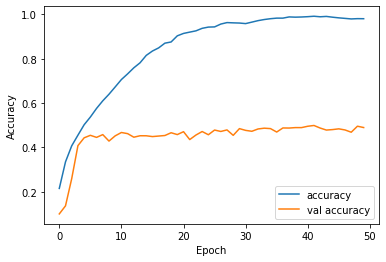

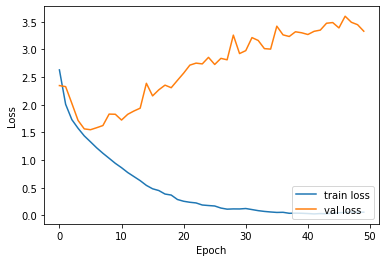

In [13]:
plot_acc_loss(history_SGD_momentum)

In [14]:
lookahead_model = get_model()

lookahead = tfa.optimizers.Lookahead(optimizer = tf.keras.optimizers.Adam(learning_rate=0.005), 
                                     sync_period=5, slow_step_size=0.8)

lookahead_model.compile(optimizer=lookahead, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        metrics=['accuracy'])

history_lookahead_2 = lookahead_model.fit(train_images, train_labels, batch_size=512, 
                              epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
98/98 [==============================] - 77s 443ms/step - loss: 3.6410 - accuracy: 0.2197 - val_loss: 195.0115 - val_accuracy: 0.1000
Epoch 2/50
98/98 [==============================] - 42s 432ms/step - loss: 1.9349 - accuracy: 0.3822 - val_loss: 430.2968 - val_accuracy: 0.1145
Epoch 3/50
98/98 [==============================] - 42s 432ms/step - loss: 1.8233 - accuracy: 0.4078 - val_loss: 3.8682 - val_accuracy: 0.1428
Epoch 4/50
98/98 [==============================] - 42s 433ms/step - loss: 1.6832 - accuracy: 0.4452 - val_loss: 914.6092 - val_accuracy: 0.1016
Epoch 5/50
98/98 [==============================] - 42s 432ms/step - loss: 1.7554 - accuracy: 0.3856 - val_loss: 14.7110 - val_accuracy: 0.1553
Epoch 6/50
98/98 [==============================] - 42s 433ms/step - loss: 1.7456 - accuracy: 0.4190 - val_loss: 335.5432 - val_accuracy: 0.1264
Epoch 7/50
98/98 [==============================] - 42s 432ms/step - loss: 1.7459 - accuracy: 0.4293 - val_loss: 2.8453 - val_accurac

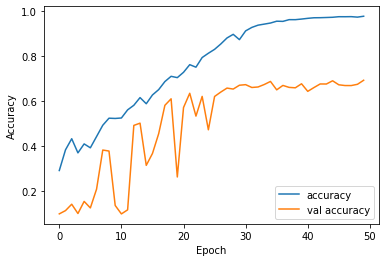

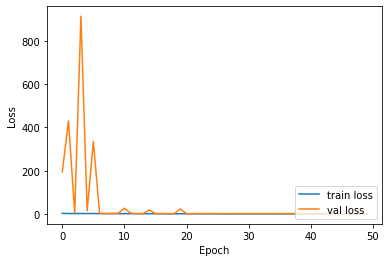

In [15]:
plot_acc_loss(history_lookahead_2)

In [16]:
SGD_momentum_model = get_model()

SGD_momentum_model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.8), 
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                           metrics=['accuracy'])

history_SGD_momentum_2 = SGD_momentum_model.fit(train_images, train_labels, batch_size=512, 
                              epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
98/98 [==============================] - 41s 359ms/step - loss: 2.7543 - accuracy: 0.2353 - val_loss: 2.3326 - val_accuracy: 0.1360
Epoch 2/50
98/98 [==============================] - 34s 347ms/step - loss: 1.7479 - accuracy: 0.4196 - val_loss: 2.1109 - val_accuracy: 0.1693
Epoch 3/50
98/98 [==============================] - 34s 346ms/step - loss: 1.4710 - accuracy: 0.4889 - val_loss: 1.7838 - val_accuracy: 0.2925
Epoch 4/50
98/98 [==============================] - 34s 346ms/step - loss: 1.3796 - accuracy: 0.5214 - val_loss: 1.5297 - val_accuracy: 0.4372
Epoch 5/50
98/98 [==============================] - 34s 347ms/step - loss: 1.2775 - accuracy: 0.5584 - val_loss: 2.7810 - val_accuracy: 0.4170
Epoch 6/50
98/98 [==============================] - 34s 347ms/step - loss: 1.1690 - accuracy: 0.5906 - val_loss: 3.5129 - val_accuracy: 0.4120
Epoch 7/50
98/98 [==============================] - 34s 346ms/step - loss: 1.1156 - accuracy: 0.6081 - val_loss: 1.2929 - val_accuracy: 0.5400

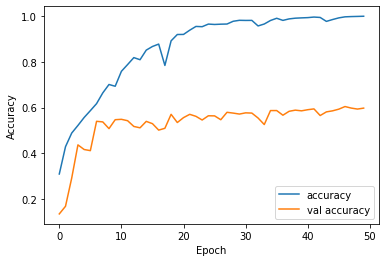

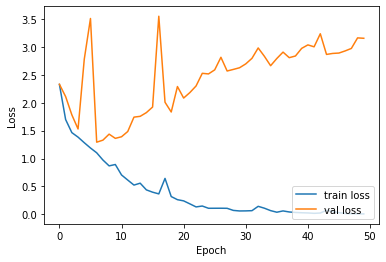

In [17]:
plot_acc_loss(history_SGD_momentum_2)

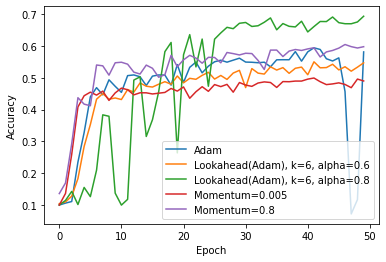

In [18]:
plt.plot(history_adam.history['val_accuracy'], label = 'Adam')
plt.plot(history_lookahead.history['val_accuracy'], label = 'Lookahead(Adam), k=6, alpha=0.6')
plt.plot(history_lookahead_2.history['val_accuracy'], label = 'Lookahead(Adam), k=6, alpha=0.8')
plt.plot(history_SGD_momentum.history['val_accuracy'], label = 'Momentum=0.005')
plt.plot(history_SGD_momentum_2.history['val_accuracy'], label = 'Momentum=0.8')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()